<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/main/Lab_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Find the following integral using the simpson's 1/3 rule**

Simpson's 1/3 rule uses higher-order polynomials to approximate the integral of a function $f(x)$ over the interval $[a,b]$. For Example, if there is an extra point midway between $f(a)$ and $f(b)$, the three points can be connected with a parabola. The area under the parabola is an approximation of the integral of $f(x)$ over the interval $[a,b]$.

<center>
    <img src="./images/simpson.PNG" width="400" />
</center>

If we are given values of $f(x)$ at 3 points as $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ then we can estimate $f(x)$ using the Lagrange polynomial of degree 2:

$$
\begin{align*}
f(x) &\approx f(x_0) \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{align*}
$$

Now, as the area under the estimated curve is an approximation of the integral of $f(x)$ over the interval $[a,b]$, we can write the integral as:

$$
\begin{align*}
I &= \int_{a}^{b} f(x) dx \\
&\approx \int_{a}^{b} \left[f(x_0)\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \right] dx
\end{align*}
$$

When $a = x_0$, $b = x_2$, $x_1 = \frac{a+b}{2}$, and $h = \frac{b-a}{2}$, we can simplify the integral to:

$$
\begin{align*}
    I &\approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2) \right] \\
    &= (b-a) \frac{f(x_0) + 4f(x_1) + f(x_2)}{6}
\end{align*}
$$

We will use Simpson's 1/3 rule to approximate the integral of $f(x) = 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5$ over the interval $[0, 0.8]$. Follow the steps below to approximate the integral using Simpson's 1/3 rule.

##### **Step 1: Define the function**

Define a function `f` that takes a single parameter `x` and returns the value of $f(x) = 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5$ at `x`. Note that the function should be able to handle both scalar and vector inputs.


In [8]:
import numpy as np

In [9]:
def f(x):
    result = 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5
    return result

##### **Step 2: Define a function to approximate the function $f(x)$ using Lagrange polynomial**

Define a function `lagrange` that takes four parameters `x0`, `x1`, `x2` and `x` and returns the value of the Lagrange polynomial of degree 2 at `x`. The function should be able to handle both scalar and vector inputs. Use the function `f` defined in Step 1 to evaluate the function at the given points.

In [10]:
def lagrange(x0, x1, x2, x):
    # finding th output values
    y0 = f(x0)
    y1 = f(x1)
    y2 = f(x2)

    l0 = (x - x1) * (x - x2) / ((x0 - x1) * (x0 - x2))
    l1 = (x - x0) * (x - x2) / ((x1 - x0) * (x1 - x2))
    l2 = (x - x0) * (x - x1) / ((x2 - x0) * (x2 - x1))

    return y0 * l0 + y1 * l1 + y2 * l2

##### **Step 3: Define the interval**
Define the interval as a numpy array of two elements, where the first element is the lower bound and the second element is the upper bound. Name the array `interval`.

In [11]:
interval = np.array([0, 0.8])

# testing with the defined interval
a = interval[0]
b = interval[1]
x0 = a

# average or midpoint
x1 = (a + b) / 2
x2 = b

#testing with the interval [0, 0.8]:"
print(f"Interval: {interval}")

#printing the interval and a midpoint
print("x0:", x0)
print("x1:", x1)
print("x2:", x2)

#printing the output
print("f(x0):", f(x0))
print("f(x1):", f(x1))
print("f(x2):", f(x2))

Interval: [0.  0.8]
x0: 0.0
x1: 0.4
x2: 0.8
f(x0): 0.2
f(x1): 2.4560000000000004
f(x2): 0.23200000000005616


##### **Step 4: Plot the function and the approximated polynomial**

Plot the function $f(x)$ and the approximated polynomial using the function `lagrange` defined in Step 2. Use the interval defined in Step 3 as the x-axis. Also, plot the points $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ on the same plot. Fill the area under the approximated polynomial using numpy's `fill_between` function.

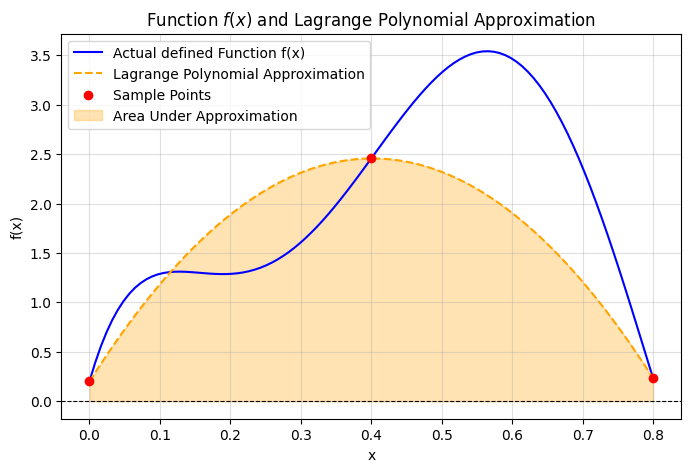

In [12]:
import matplotlib.pyplot as plt

#defining points for the Lagrange polynomial, the interval points - x0, x2 and mid point x1
x0, x1, x2 = interval[0], (interval[0] + interval[1]) / 2, interval[1]

#x values for plotting
x_points = np.linspace(interval[0], interval[1], 100)

y_points = f(x_points)  # defined f(x) values
L_values = lagrange(x0, x1, x2, x_points)  # approximated Lagrange polynomial values

#ploting the function f(x)
plt.figure(figsize=(8, 5)) # the graph size
plt.plot(x_points, y_points, label="Actual defined Function f(x)", color="blue")
plt.plot(x_points, L_values, label="Lagrange Polynomial Approximation", color="orange", linestyle="--")

#ploting the points (x0, f(x0)), (x1, f(x1)), (x2, f(x2))
plt.scatter([x0, x1, x2], [f(x0), f(x1), f(x2)], color="red", label="Sample Points", zorder=5)

#filling the area under the approximated polynomial using fill_between
plt.fill_between(x_points, L_values, color="orange", alpha=0.3, label="Area Under Approximation")

#adding labels, legend, and title
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function $f(x)$ and Lagrange Polynomial Approximation")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # Horizontal line for reference
plt.legend()
plt.grid(alpha=0.4)

#for displaying the plot
plt.show()


##### **Step 5: Define a function to approximate the integral using Simpson's 1/3 rule**

Define a function `simpson` that takes a parameter `interval` and returns the approximate value of the integral of $f(x)$ over the interval `interval` using Simpson's 1/3 rule. You have to employ the following steps:

*   Calculate the midpoint of the interval. Store the value in a variable named `midpoint`.
*   Calculate the value of $f(x_0)$, $f(x_1)$, and $f(x_2)$, where $x_0 = a$, $x_1 = \frac{a+b}{2} = midpoint$, and $x_2 = b$. Store the values in variables named `f0`, `f1`, and `f2` respectively.
*   Calculate the approximate value of the integral using Simpson's 1/3 rule. Store the value in a variable named `I`.
*   Return the value of `I`.

In [6]:
def simpson(interval):
    # this is for the calculating midpoints
    midpoint = (interval[0] + interval[1]) / 2

    # this is for the value of f(x0), f(x1), and f(x2)
    f0 = f(interval[0])
    f1 = f(midpoint)
    f2 = f(interval[1])

    # this is for the approximate value of the integral using Simpson's 1/3 rule
    I = (interval[1] - interval[0]) /6 * (f0 + 4 * f1 + f2)
    return I # returning part

# Example usage with the defined interval
approx_integral = simpson(interval)
print("\nApproximate value of the integral using Simpson's 1/3 rule:")
print(approx_integral)


Approximate value of the integral using Simpson's 1/3 rule:
1.3674666666666742


##### **Step 6: Approximate the integral using Simpson's 1/3 rule**

Call the function `simpson` with the interval `interval` as the parameter. Store the value returned by the function in a variable named `I`. Print the value of `I`. Then you should compute the integral analytically and find the absolute relative error between the two values. Print the absolute relative error.

In [7]:
I_approx = simpson(interval)
print(f"Approximate integral (Simpson's 1/3 rule): {I_approx:.2f}")
def analytical_integral(x):
    return (
        0.2 * x +
        25 * x**2 / 2 -
        200 * x**3 / 3 +
        675 * x**4 / 4 -
        900 * x**5 / 5 +
        400 * x**6 / 6
    )

#extracting the interval
a, b = interval[0], interval[1]
I_actual = analytical_integral(b) - analytical_integral(a)
print(f"Actual integral (analytical): {I_actual:.6f}")

#Calculating the absolute relative error
absolute_relative_error = abs((I_actual - I_approx) / I_actual) * 100
print(f"Absolute relative error: {absolute_relative_error:.2f}%")

Approximate integral (Simpson's 1/3 rule): 1.37
Actual integral (analytical): 1.640533
Absolute relative error: 16.64%
